## 기상과 지하철 혼잡도 Pearson 상관분석(월별, 계절별) 및 Spearman 상관분석

In [35]:
pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.9 MB 7.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.9 MB 9.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/7.9 MB 9.6 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.9 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import numpy as np

In [ ]:

FILE_NAME_21 = 'dataset_csv_file/train_subway21.csv'
FILE_NAME_22 = 'dataset_csv_file/train_subway22.csv'
FILE_NAME_23 = 'dataset_csv_file/train_subway23.csv'

train_subway21_df = pd.read_csv(FILE_NAME_21)
train_subway22_df = pd.read_csv(FILE_NAME_22)
train_subway23_df = pd.read_csv(FILE_NAME_23)


In [3]:
print(train_subway21_df.columns)
print(train_subway22_df.columns)
print(train_subway23_df.columns)

Index(['train_subway21.tm', 'train_subway21.line',
       'train_subway21.station_number', 'train_subway21.station_name',
       'train_subway21.direction', 'train_subway21.stn', 'train_subway21.ta',
       'train_subway21.wd', 'train_subway21.ws', 'train_subway21.rn_day',
       'train_subway21.rn_hr1', 'train_subway21.hm', 'train_subway21.si',
       'train_subway21.ta_chi', 'train_subway21.congestion'],
      dtype='object')
Index(['train_subway22.tm', 'train_subway22.line',
       'train_subway22.station_number', 'train_subway22.station_name',
       'train_subway22.direction', 'train_subway22.stn', 'train_subway22.ta',
       'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day',
       'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si',
       'train_subway22.ta_chi', 'train_subway22.congestion'],
      dtype='object')
Index(['train_subway23.tm', 'train_subway23.line',
       'train_subway23.station_number', 'train_subway23.station_name',
       'train_

In [4]:
train_subway21_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway22_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway23_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']

In [5]:
train_subway_df = train_subway21_df.copy()
train_subway_df = pd.concat([train_subway_df, train_subway22_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848338,2022123119,8,2828,남위례,하선,572,-1.6,199.0,0.2,0.0,0.0,67.7,-99.0,-2.1,19
10848339,2022123120,8,2828,남위례,하선,572,-2.6,0.0,0.0,0.0,0.0,73.7,-99.0,-3.2,16
10848340,2022123121,8,2828,남위례,하선,572,-2.9,17.0,0.0,0.0,0.0,75.1,-99.0,-3.7,21
10848341,2022123122,8,2828,남위례,하선,572,-3.1,185.3,0.1,0.0,0.0,75.7,-99.0,-3.9,20


In [6]:
train_subway_df = pd.concat([train_subway_df, train_subway23_df])
train_subway_df.reset_index(inplace=True, drop=True)

train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


In [7]:
# 추가 결측치 반영 
# 풍향 변수 -9.9 -> 결측치

none_index = train_subway_df[train_subway_df['WD']==-9.9].index
train_subway_df.loc[none_index, 'WD'] = -99.0

In [8]:
train_subway_df[train_subway_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


In [9]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,-99.0,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,-99.0,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,-99.0,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,-99.0,-1.3,18


### 결측치 처리

In [8]:
train_subway_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [10]:
for column in train_subway_df.columns:

    none_index = train_subway_df[train_subway_df[column]==-99.0].index
    train_subway_df.loc[none_index, column] =  None

In [11]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

### 데이터 확인

In [12]:
train_subway_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,NaN,NaN,-12.6,0
1,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,NaN,NaN,-9.8,0
2,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,NaN,NaN,-10.3,1
3,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,NaN,NaN,-10.1,2
4,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,NaN,NaN,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369319,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,NaN,0.0,18
16369320,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,NaN,-0.6,17
16369321,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,NaN,-1.1,21
16369322,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,NaN,-1.3,18


1. 결측치 제거 후 이상치 확인

In [13]:
train_subway_dropna_df = train_subway_df.dropna()
train_subway_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [14]:
train_subway_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 216468
WD                 287270
WS                 230786
RN_DAY             351574
RN_HR1             360796
HM                 844594
SI                6064242
ta_chi                352
Congestion              0
dtype: int64

In [15]:
train_subway_dropna_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4259,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
4266,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
4267,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
4268,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4269,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369314,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
16369315,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
16369316,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
16369317,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


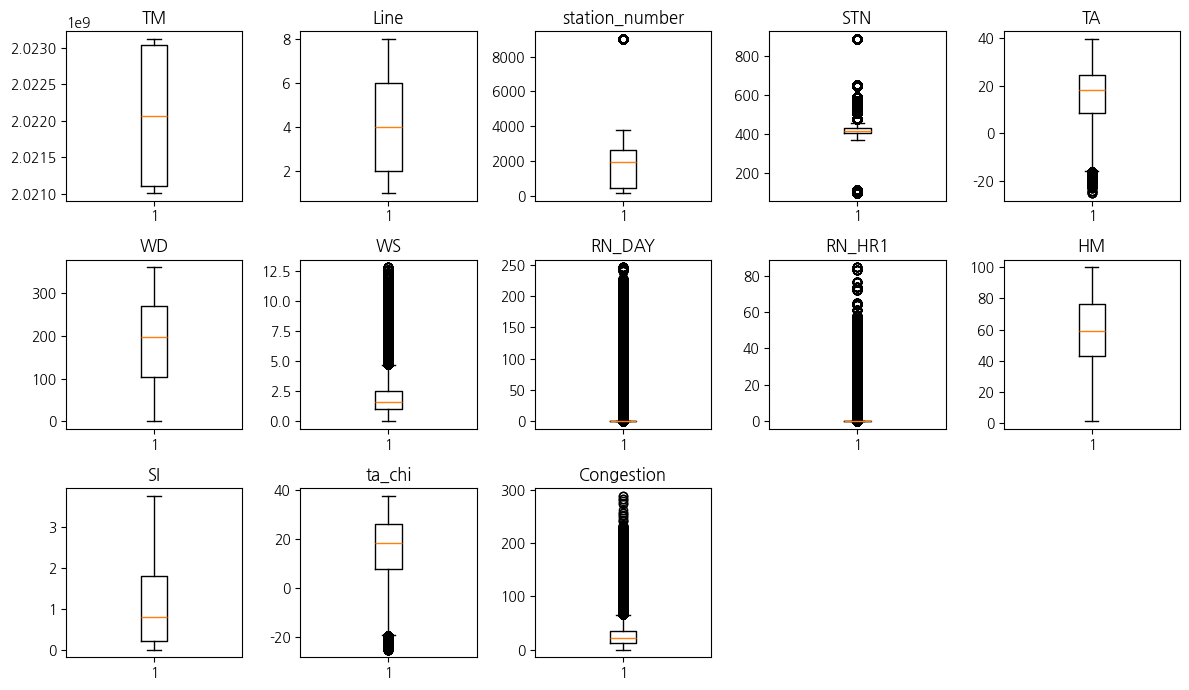

In [21]:
col = 3
row = 5

plt.figure(figsize=(12,7))

# 수치형 데이터만 boxplot 그리도록
for i, column_name in enumerate(train_subway_dropna_df.select_dtypes(include=np.number).columns,1):
  # 인덱스를 1로 지정
  plt.subplot(col, row, i)
  plt.title(column_name)
  plt.boxplot(train_subway_dropna_df[column_name])

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

station_number 이상치 확인

In [23]:
train_subway_dropna_df[train_subway_dropna_df['station_number'] >= 8000]['station_number'].unique()

array([9001, 9006])

In [24]:
train_subway_dropna_df[train_subway_dropna_df['station_number']==9001]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
1609655,2021010108,2,9001,성수E,내선,427,-9.1,96.9,0.5,0.0,0.0,75.5,0.00,-10.0,0
1609656,2021010109,2,9001,성수E,내선,427,-6.8,0.0,0.0,0.0,0.0,71.7,0.15,-7.1,0
1609657,2021010110,2,9001,성수E,내선,427,-4.4,128.6,0.7,0.0,0.0,60.5,0.65,-4.9,0
1609658,2021010111,2,9001,성수E,내선,427,-2.3,136.6,0.8,0.0,0.0,55.9,1.20,-2.3,0
1609659,2021010112,2,9001,성수E,내선,427,-2.1,97.7,0.8,0.0,0.0,59.1,1.48,-1.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470877,2023123114,2,9001,성수E,외선,427,5.9,317.9,2.3,5.0,0.0,75.7,0.72,3.8,27
12470878,2023123115,2,9001,성수E,외선,427,5.7,316.3,1.9,5.0,0.0,76.8,1.03,3.3,32
12470879,2023123116,2,9001,성수E,외선,427,5.3,311.4,1.6,5.0,0.0,78.9,0.45,2.8,30
12470880,2023123117,2,9001,성수E,외선,427,4.7,319.4,1.3,5.0,0.0,80.7,0.21,2.5,35


In [30]:
train_subway_df[train_subway_df['station_number']==9006]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4374550,2021010100,6,9006,응암S,상선,400,-6.5,302.6,1.7,0.0,0.0,57.5,NaN,-9.7,0
4374551,2021010101,6,9006,응암S,상선,400,-7.2,320.3,0.6,0.0,0.0,57.5,NaN,-8.1,0
4374552,2021010105,6,9006,응암S,상선,400,-8.7,98.0,1.3,0.0,0.0,66.4,NaN,-9.7,0
4374553,2021010106,6,9006,응암S,상선,400,-8.9,51.2,0.5,0.0,0.0,75.1,NaN,-9.7,0
4374554,2021010107,6,9006,응암S,상선,400,-8.2,300.4,0.4,0.0,0.0,67.4,NaN,-8.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283872,2023123119,6,9006,응암S,하선,400,1.4,0.0,0.0,NaN,NaN,92.1,NaN,1.3,15
15283873,2023123120,6,9006,응암S,하선,400,0.8,308.8,0.5,NaN,NaN,95.3,NaN,0.7,13
15283874,2023123121,6,9006,응암S,하선,400,0.4,320.6,0.1,NaN,NaN,96.2,NaN,0.2,14
15283875,2023123122,6,9006,응암S,하선,400,0.0,117.6,0.1,NaN,NaN,97.1,NaN,0.0,14


STN 이상치 확인

In [25]:
train_subway_dropna_df[train_subway_dropna_df['STN'] >= 800]['STN'].unique()

array([889])

In [26]:
train_subway_dropna_df[train_subway_dropna_df['STN']==889]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
1272395,2021010108,2,222,강남,내선,889,-10.0,226.2,0.7,0.0,0.0,77.5,0.00,-7.4,3
1272396,2021010109,2,222,강남,내선,889,-8.9,228.5,0.3,0.0,0.0,75.9,0.27,-6.7,4
1272397,2021010110,2,222,강남,내선,889,-4.1,191.6,0.2,0.0,0.0,62.2,0.76,-4.8,6
1272398,2021010111,2,222,강남,내선,889,-2.2,50.6,0.9,0.0,0.0,49.8,1.40,-2.7,8
1272399,2021010112,2,222,강남,내선,889,-0.4,76.9,0.6,0.0,0.0,47.8,1.74,-1.1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757795,2023123114,7,2741,상도,하선,889,3.9,264.1,0.8,6.5,0.0,89.3,0.18,3.1,20
15757796,2023123115,7,2741,상도,하선,889,4.6,263.5,1.0,6.5,0.0,85.1,0.65,3.9,22
15757797,2023123116,7,2741,상도,하선,889,4.6,225.5,0.6,6.5,0.0,88.3,0.66,4.4,23
15757798,2023123117,7,2741,상도,하선,889,3.9,335.1,0.5,6.5,0.0,92.9,0.26,4.1,24


Congestion 추가 이상치 확인

In [27]:
train_subway_dropna_df[(train_subway_dropna_df['Congestion']==0) & (train_subway_dropna_df['Line'] == 4) & (train_subway_dropna_df['station_name']!='남위례')]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
2299504,2021010108,4,409,당고개,상선,406,-11.6,276.1,0.2,0.0,0.0,82.1,0.00,-11.4,0
2299505,2021010109,4,409,당고개,상선,406,-10.5,152.4,0.3,0.0,0.0,84.3,0.27,-10.3,0
2299506,2021010110,4,409,당고개,상선,406,-6.5,207.0,0.8,0.0,0.0,67.4,0.76,-6.7,0
2299507,2021010111,4,409,당고개,상선,406,-4.0,153.8,1.9,0.0,0.0,56.6,1.40,-4.0,0
2299508,2021010112,4,409,당고개,상선,406,-2.3,115.6,0.8,0.0,0.0,50.2,1.74,-2.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907948,2023123114,4,1762,오이도,하선,565,3.9,259.0,2.8,4.0,0.0,83.6,0.72,2.9,0
13907949,2023123115,4,1762,오이도,하선,565,5.0,284.7,1.7,4.0,0.0,79.2,1.03,4.8,0
13907950,2023123116,4,1762,오이도,하선,565,4.8,300.4,1.4,4.0,0.0,77.3,0.45,4.9,0
13907951,2023123117,4,1762,오이도,하선,565,4.5,0.0,0.0,4.0,0.0,80.7,0.21,4.5,0


In [28]:
train_subway_dropna_df[(train_subway_dropna_df['station_name']=='남위례') & (train_subway_dropna_df['Congestion']==0)]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
5451728,2021122208,8,2828,남위례,상선,572,-2.9,200.5,0.1,0.0,0.0,62.7,0.01,-3.8,0
5451729,2021122209,8,2828,남위례,상선,572,-0.9,295.5,0.5,0.0,0.0,52.5,0.31,-1.7,0
5451730,2021122210,8,2828,남위례,상선,572,0.7,329.2,0.9,0.0,0.0,44.5,0.85,1.0,0
5451731,2021122211,8,2828,남위례,상선,572,2.4,318.7,0.7,0.0,0.0,41.0,1.39,3.6,0
5451732,2021122212,8,2828,남위례,상선,572,4.2,351.2,0.8,0.0,0.0,34.0,1.71,5.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452133,2021123114,8,2828,남위례,하선,572,-3.1,343.7,2.1,0.0,0.0,21.9,1.91,-4.8,0
5452134,2021123115,8,2828,남위례,하선,572,-3.6,311.7,3.2,0.0,0.0,21.2,1.59,-6.2,0
5452135,2021123116,8,2828,남위례,하선,572,-3.1,334.9,2.0,0.0,0.0,22.2,1.02,-5.8,0
5452136,2021123117,8,2828,남위례,하선,572,-4.6,313.6,2.1,0.0,0.0,21.4,0.47,-7.7,0


In [29]:
train_subway_dropna_df[train_subway_dropna_df['station_name']=='남위례']['Congestion'].unique()

array([ 0,  9, 11, 10, 14, 12,  7, 13, 16, 15,  8, 53, 32, 19, 56, 34, 20,
       55, 35, 18, 54, 39, 22, 23, 21, 24,  6,  5, 36, 38, 42, 29, 48, 31,
       17, 57, 37, 59, 49, 52,  4, 44, 30, 51, 28, 43, 33, 50, 25, 26, 27,
       58, 60, 41, 61, 65, 45, 40, 62, 63, 64, 66, 68, 46, 67, 69, 47, 70,
        3,  2, 72, 73, 71, 74, 75, 77, 76, 84, 79, 83])

In [16]:
# 남위례 Congestion 0 제거 

zero_index =train_subway_dropna_df[(train_subway_dropna_df['station_name']=='남위례') & (train_subway_dropna_df['Congestion']==0)].index
train_subway_dropna_0_df = train_subway_dropna_df.drop(zero_index)
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4259,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
4266,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
4267,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
4268,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4269,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369314,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
16369315,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
16369316,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
16369317,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


In [17]:
train_subway_dropna_0_df.reset_index(inplace=True, drop=True)

In [18]:
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


2. 데이터 분포 확인

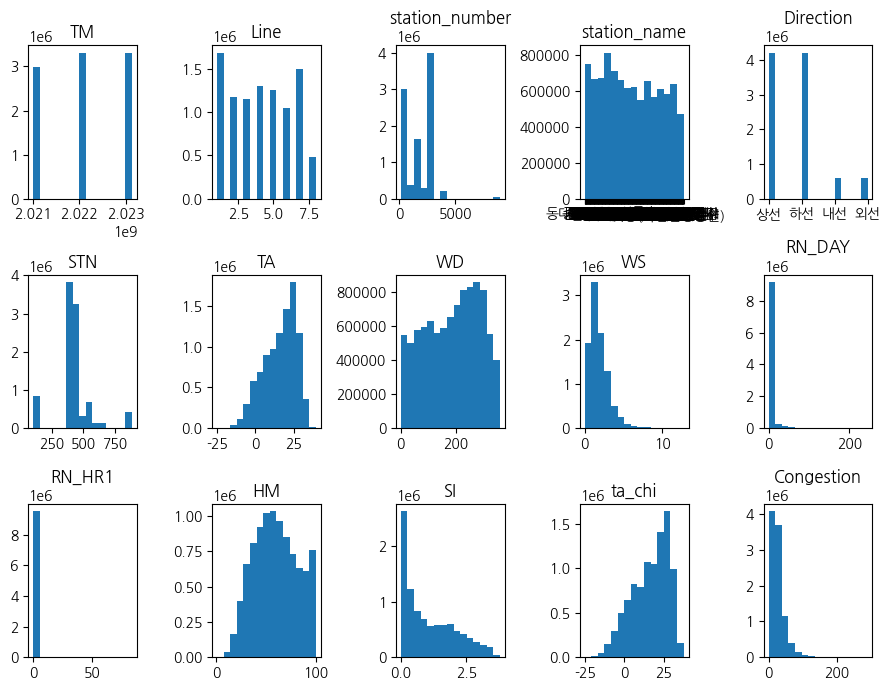

In [16]:
col = 3
row = 5

plt.figure(figsize=(9,7))

for i, column_name in enumerate(train_subway_dropna_0_df.columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(train_subway_dropna_0_df[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

### 기상과 지하철 혼잡도 Pearson 상관분석

In [37]:
train_subway_dropna_0_df.corr(numeric_only=True)

,TM,Line,station_number,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
TM,1.000000,0.002129,-0.009197,0.005945,0.005311,0.036052,-0.016835,0.041429,0.020355,-0.002547,0.014460,0.008314,0.183607
Line,0.002129,1.000000,0.639598,0.112973,0.014041,-0.010298,-0.031794,0.002198,0.000928,-0.047287,0.010357,0.012929,-0.013638
station_number,-0.009197,0.639598,1.000000,-0.020716,0.004812,-0.000927,-0.016765,0.001210,0.000584,-0.004636,0.001138,0.005182,-0.127829
STN,0.005945,0.112973,-0.020716,1.000000,0.011405,-0.008669,-0.224474,-0.001119,-0.000293,0.022151,0.005081,0.011392,0.119785
TA,0.005311,0.014041,0.004812,0.011405,1.000000,-0.083182,-0.045428,0.092977,0.052924,0.170678,0.247836,0.992142,0.002309
WD,0.036052,-0.010298,-0.000927,-0.008669,-0.083182,1.000000,0.172857,-0.033512,-0.038820,-0.189701,0.081758,-0.106424,0.012541
WS,-0.016835,-0.031794,-0.016765,-0.224474,-0.045428,0.172857,1.000000,0.027756,0.019276,-0.238352,0.195467,-0.080542,-0.010877
RN_DAY,0.041429,0.002198,0.001210,-0.001119,0.092977,-0.033512,0.027756,1.000000,0.513591,0.315927,-0.163112,0.119800,-0.012507
RN_HR1,0.020355,0.000928,0.000584,-0.000293,0.052924,-0.038820,0.019276,0.513591,1.000000,0.214284,-0.122956,0.073137,-0.010213
HM,-0.002547,-0.047287,-0.004636,0.022151,0.170678,-0.189701,-0.238352,0.315927,0.214284,1.000000,-0.531760,0.238306,-0.048824


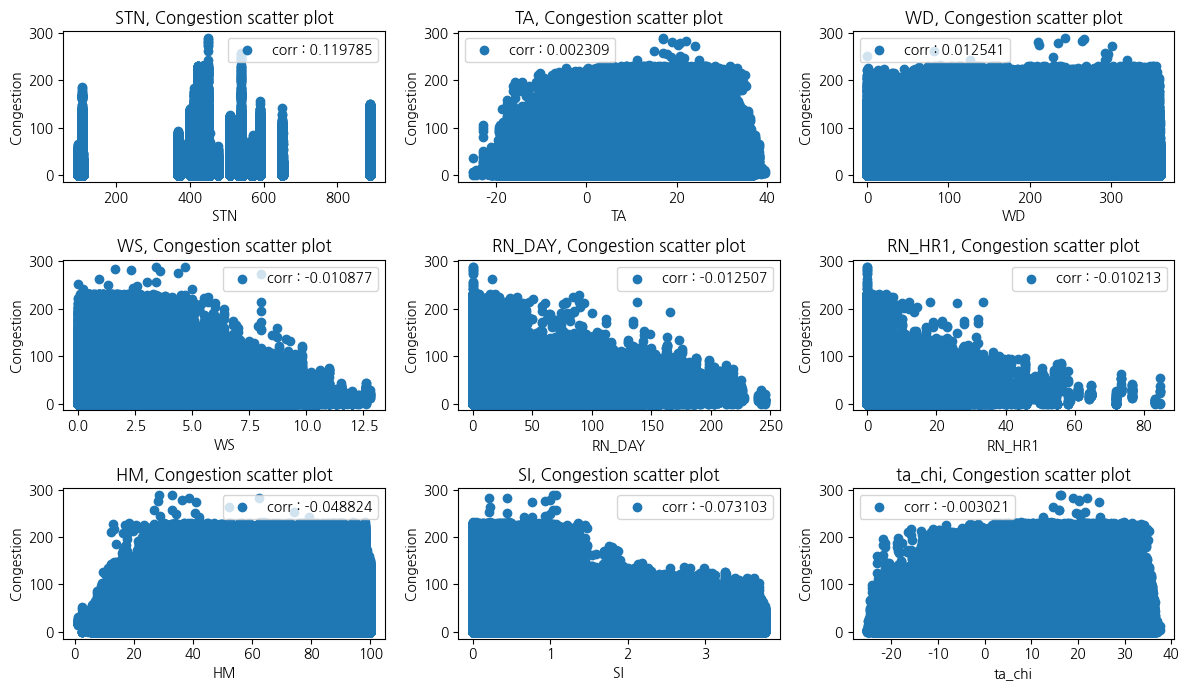

In [38]:
col = 3 
row = 3 
column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']

plt.figure(figsize=(12,7))

for i, colum_name in enumerate(column_list,1):
    plt.subplot(col, row, i)
    plt.title(f'{colum_name}, Congestion scatter plot')
    corr_result = train_subway_dropna_0_df.corr(numeric_only=True)['Congestion'][colum_name]
    plt.scatter(train_subway_dropna_0_df[colum_name], train_subway_dropna_0_df['Congestion'], label=f'corr : {round(corr_result,6)}')
    plt.xlabel(colum_name)
    plt.ylabel('Congestion')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [16]:
train_subway_df_month = train_subway_dropna_0_df.copy()
train_subway_df_month

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


In [25]:
train_subway_dropna_0_df['month'] = 0

for i in range(train_subway_dropna_0_df.shape[0]):
    tm_data = str(train_subway_dropna_0_df.iloc[i,0])
    train_subway_dropna_0_df.iloc[i,-1] = int(tm_data[4:6])

In [41]:
train_subway_dropna_0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9594136 entries, 0 to 9594135
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TM              int64  
 1   Line            int64  
 2   station_number  int64  
 3   station_name    object 
 4   Direction       object 
 5   STN             int64  
 6   TA              float64
 7   WD              float64
 8   WS              float64
 9   RN_DAY          float64
 10  RN_HR1          float64
 11  HM              float64
 12  SI              float64
 13  ta_chi          float64
 14  Congestion      int64  
 15  month           int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 1.1+ GB


In [42]:
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,month
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10,7
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14,7
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32,7
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48,7
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13,12
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14,12
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16,12
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19,12


In [18]:
train_subway_dropna_0_df['month'].value_counts()

month
8     953993
5     941810
7     937521
6     895275
4     869988
9     806968
10    772400
3     719420
12    689474
11    689428
1     663824
2     654035
Name: count, dtype: int64

In [43]:
def month_scatter_plot(month):
    col = 3 
    row = 3 
    column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']
    train_subway_df_choice_month = train_subway_dropna_0_df[train_subway_dropna_0_df['month']==month]

    plt.figure(figsize=(12,7))

    for i, colum_name in enumerate(column_list,1):
        plt.subplot(col, row, i)
        plt.title(f'{colum_name}, Congestion')
        corr_result = train_subway_df_choice_month.corr(numeric_only=True)['Congestion'][colum_name]
        plt.scatter(train_subway_df_choice_month[colum_name], train_subway_df_choice_month['Congestion'], label=f'corr : {round(corr_result,6)}')
        print(f'{colum_name}, Congestion 상관계수 : {round(corr_result,6)}')
        plt.xlabel(colum_name)
        plt.ylabel('Congestion')
        plt.legend(loc="best")

    plt.suptitle(f"{month}월 scatter plot")
    plt.tight_layout()
    plt.show()

STN, Congestion 상관계수 : 0.122419
TA, Congestion 상관계수 : 0.044312
WD, Congestion 상관계수 : 0.006382
WS, Congestion 상관계수 : -0.024921
RN_DAY, Congestion 상관계수 : 0.05168
RN_HR1, Congestion 상관계수 : 0.044059
HM, Congestion 상관계수 : 0.029947
SI, Congestion 상관계수 : -0.176609
ta_chi, Congestion 상관계수 : 0.044145


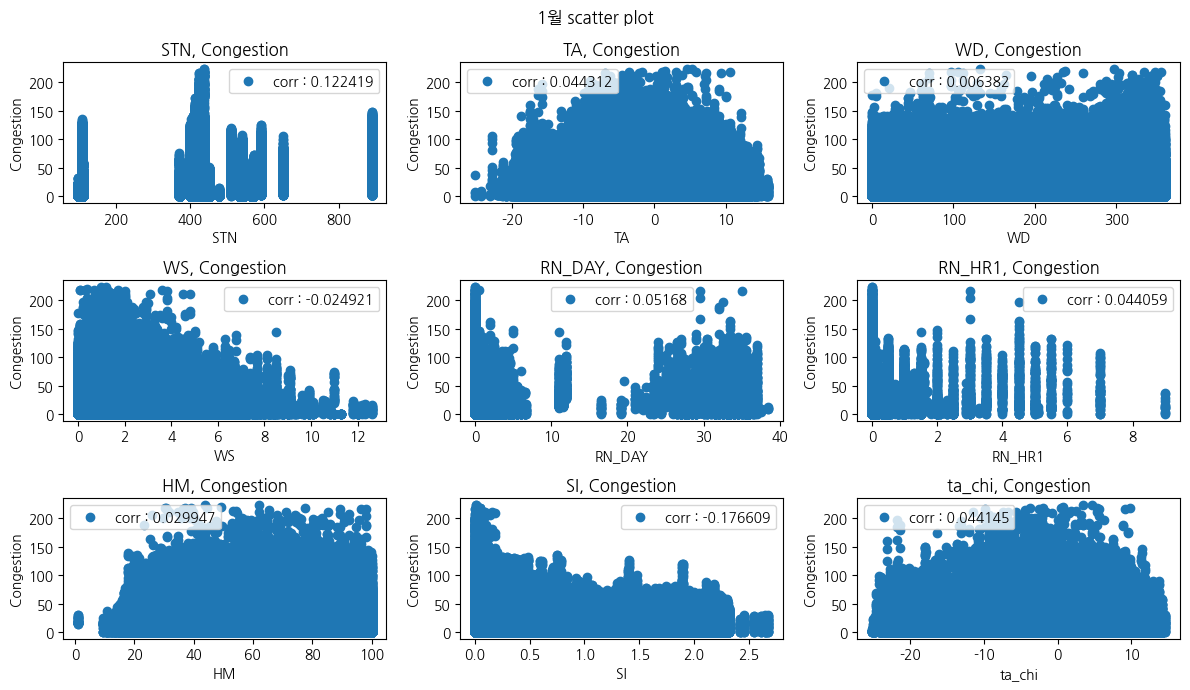

In [44]:
month_scatter_plot(1)

STN, Congestion 상관계수 : 0.123065
TA, Congestion 상관계수 : 0.014887
WD, Congestion 상관계수 : -0.011101
WS, Congestion 상관계수 : -0.052765
RN_DAY, Congestion 상관계수 : -0.032132
RN_HR1, Congestion 상관계수 : -0.005993
HM, Congestion 상관계수 : -0.023788
SI, Congestion 상관계수 : -0.137255
ta_chi, Congestion 상관계수 : 0.024775


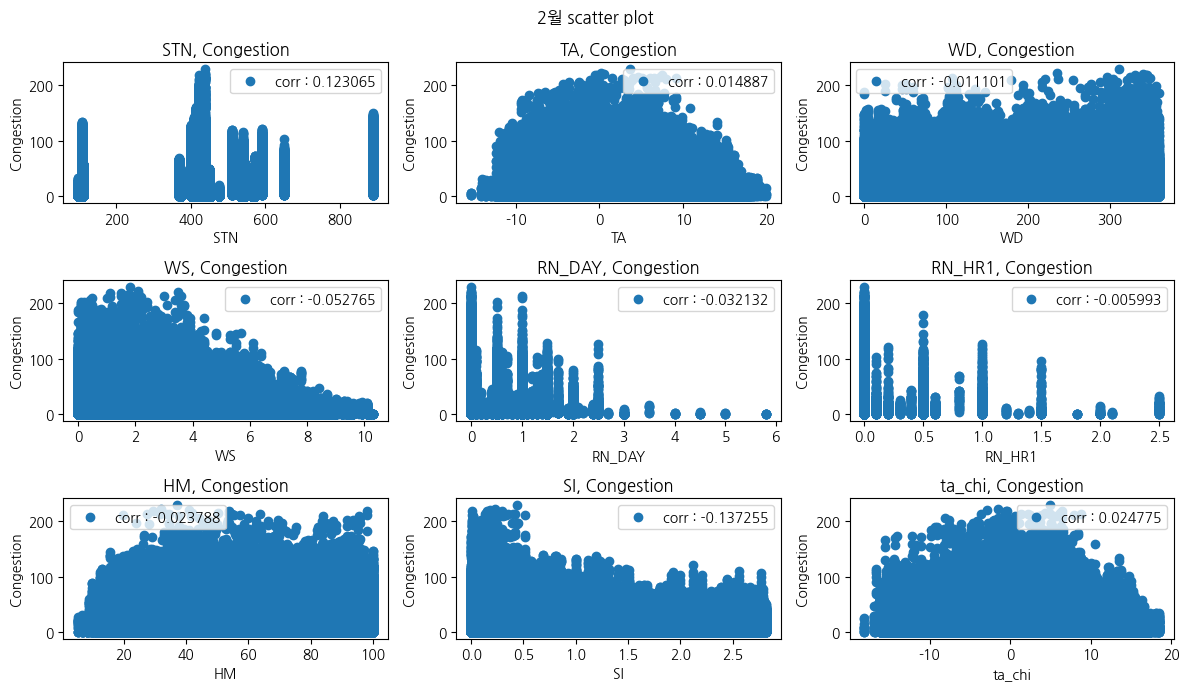

In [45]:
month_scatter_plot(2)

STN, Congestion 상관계수 : 0.122786
TA, Congestion 상관계수 : 0.081284
WD, Congestion 상관계수 : -0.000427
WS, Congestion 상관계수 : -0.050891
RN_DAY, Congestion 상관계수 : -0.12658
RN_HR1, Congestion 상관계수 : -0.085814
HM, Congestion 상관계수 : -0.140888
SI, Congestion 상관계수 : -0.086051
ta_chi, Congestion 상관계수 : 0.090205


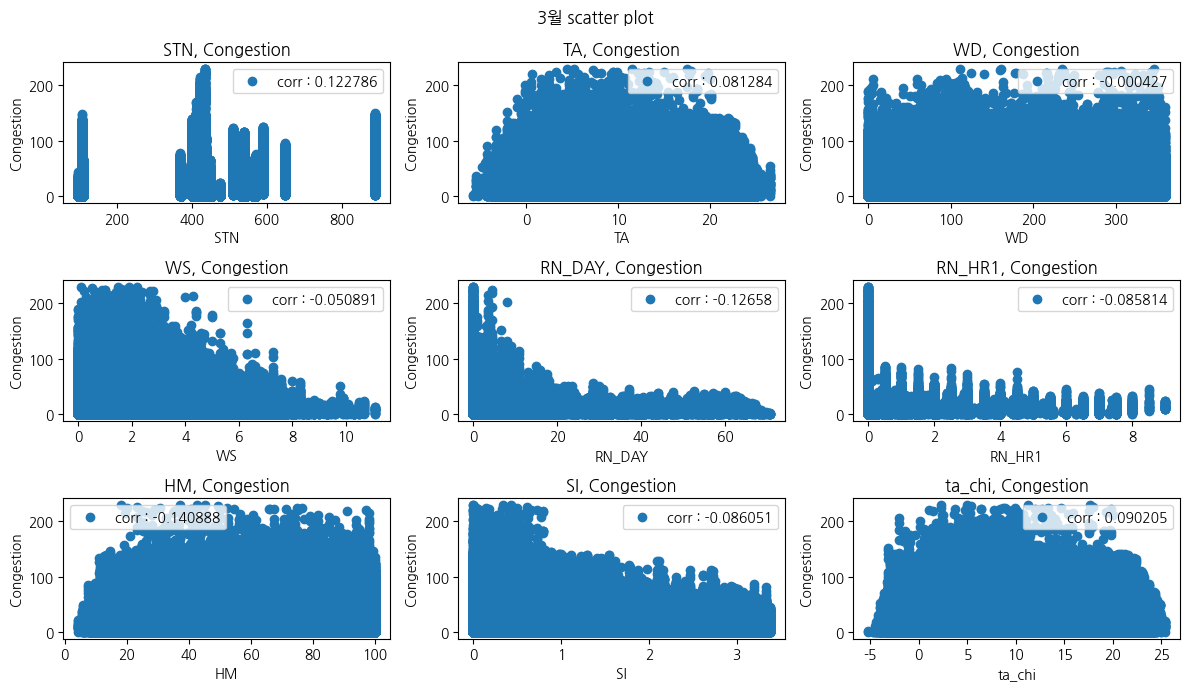

In [46]:
month_scatter_plot(3)

STN, Congestion 상관계수 : 0.121387
TA, Congestion 상관계수 : 0.031086
WD, Congestion 상관계수 : -0.002549
WS, Congestion 상관계수 : -0.008684
RN_DAY, Congestion 상관계수 : 0.01069
RN_HR1, Congestion 상관계수 : -0.017571
HM, Congestion 상관계수 : -0.021703
SI, Congestion 상관계수 : -0.076364
ta_chi, Congestion 상관계수 : 0.033351


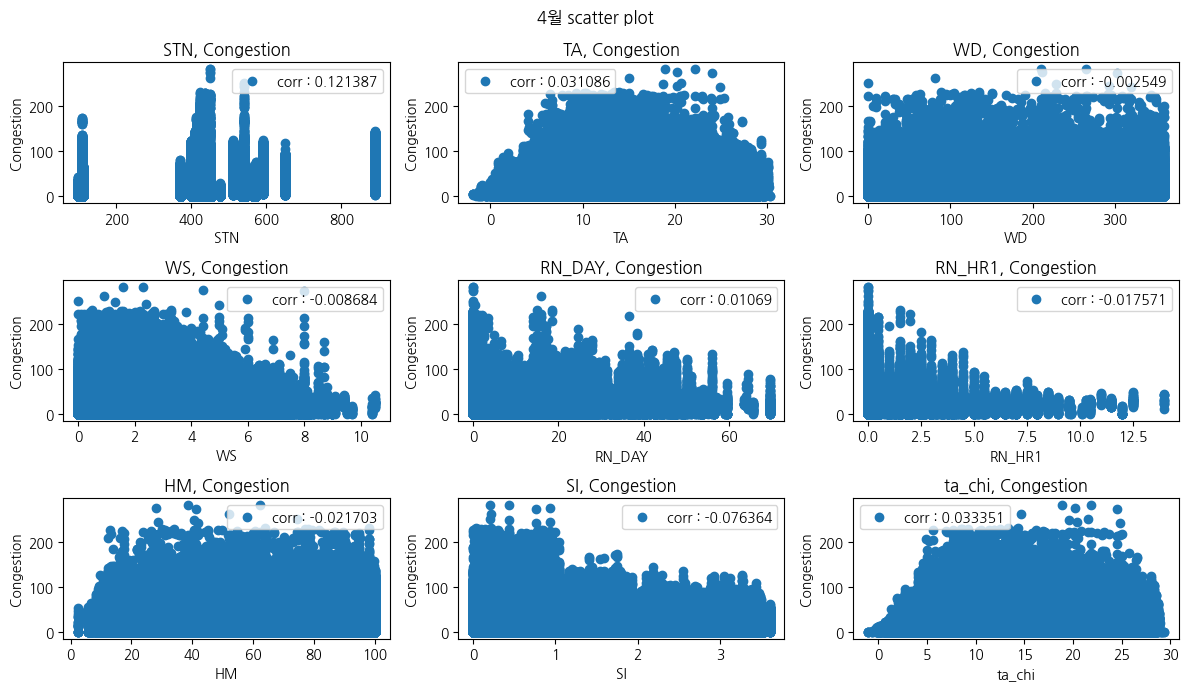

In [47]:
month_scatter_plot(4)

STN, Congestion 상관계수 : 0.116835
TA, Congestion 상관계수 : 0.138448
WD, Congestion 상관계수 : -0.001693
WS, Congestion 상관계수 : 0.003423
RN_DAY, Congestion 상관계수 : -0.070194
RN_HR1, Congestion 상관계수 : -0.060592
HM, Congestion 상관계수 : -0.130711
SI, Congestion 상관계수 : 0.013722
ta_chi, Congestion 상관계수 : 0.109924


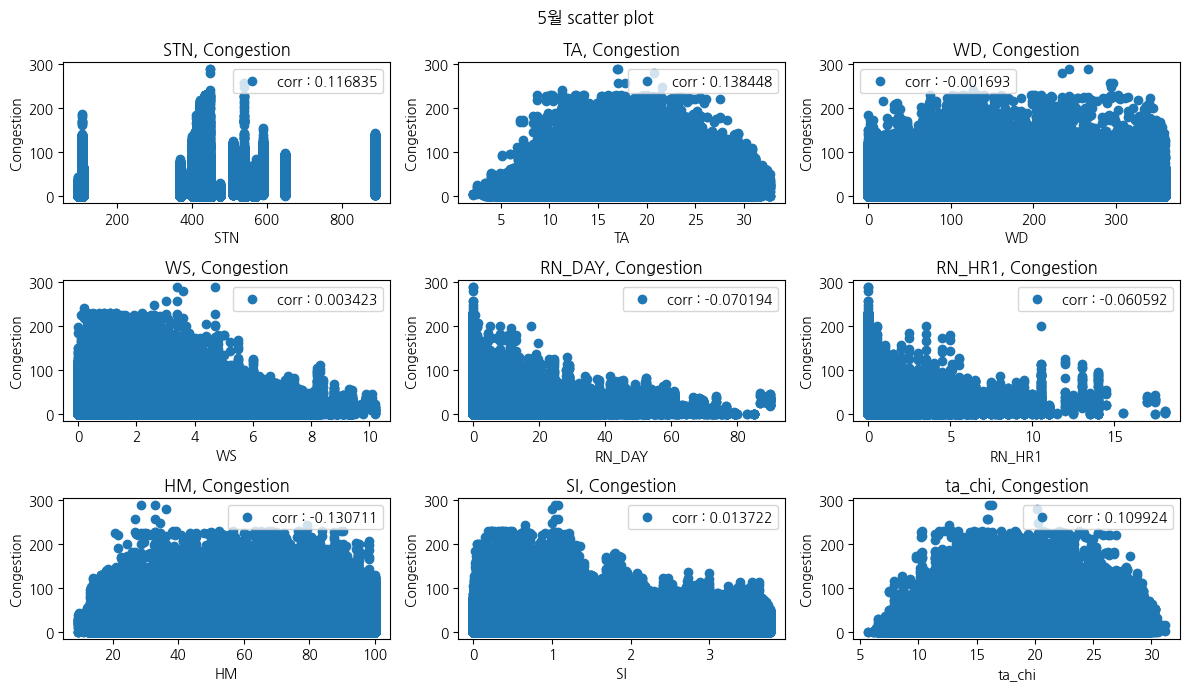

In [48]:
month_scatter_plot(5)

STN, Congestion 상관계수 : 0.118287
TA, Congestion 상관계수 : 0.068871
WD, Congestion 상관계수 : 0.026049
WS, Congestion 상관계수 : 0.000763
RN_DAY, Congestion 상관계수 : 0.002921
RN_HR1, Congestion 상관계수 : -0.010716
HM, Congestion 상관계수 : -0.049843
SI, Congestion 상관계수 : -0.011633
ta_chi, Congestion 상관계수 : 0.054798


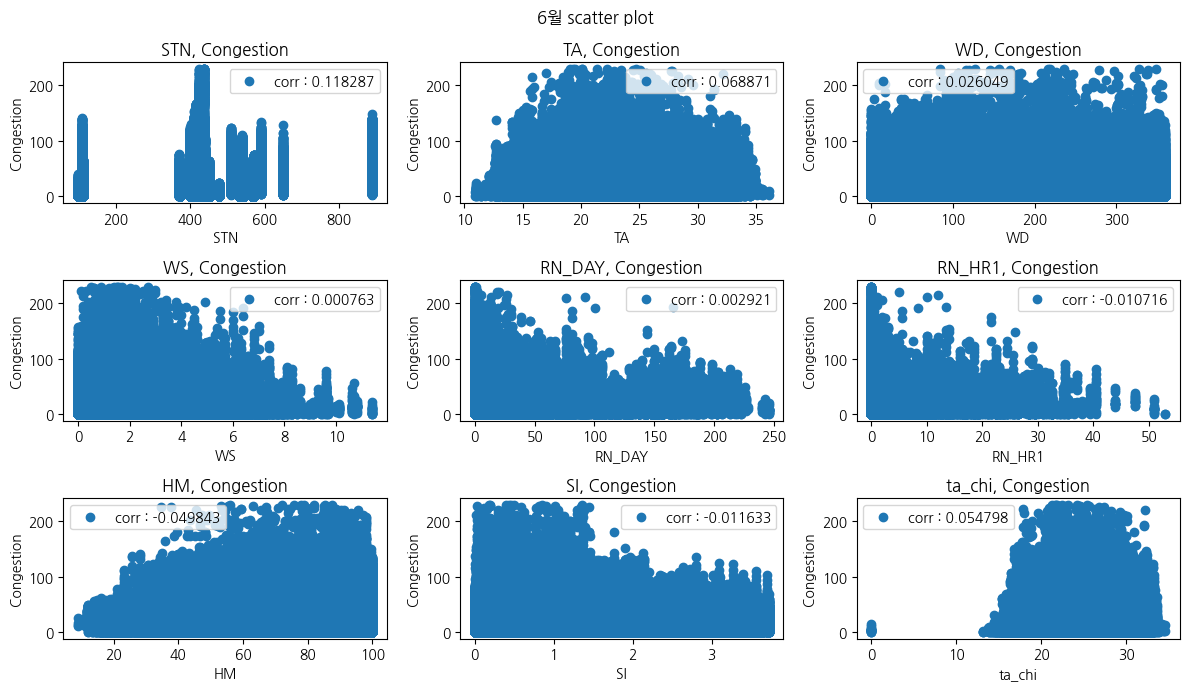

In [49]:
month_scatter_plot(6)

STN, Congestion 상관계수 : 0.121324
TA, Congestion 상관계수 : 0.012508
WD, Congestion 상관계수 : 0.023077
WS, Congestion 상관계수 : 0.007339
RN_DAY, Congestion 상관계수 : 0.038346
RN_HR1, Congestion 상관계수 : 0.007713
HM, Congestion 상관계수 : -0.005513
SI, Congestion 상관계수 : -0.050405
ta_chi, Congestion 상관계수 : 0.005867


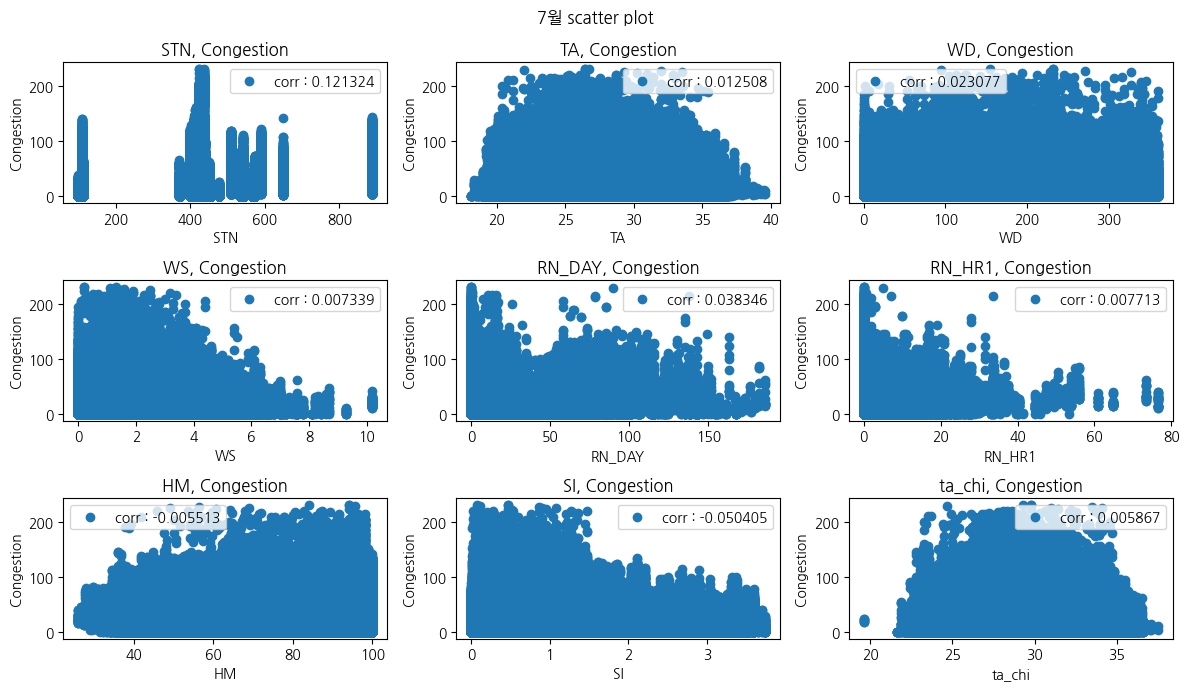

In [50]:
month_scatter_plot(7)

STN, Congestion 상관계수 : 0.119902
TA, Congestion 상관계수 : 0.045357
WD, Congestion 상관계수 : 0.01472
WS, Congestion 상관계수 : 0.02055
RN_DAY, Congestion 상관계수 : 0.015909
RN_HR1, Congestion 상관계수 : 0.013293
HM, Congestion 상관계수 : -0.045272
SI, Congestion 상관계수 : -0.025386
ta_chi, Congestion 상관계수 : 0.032443


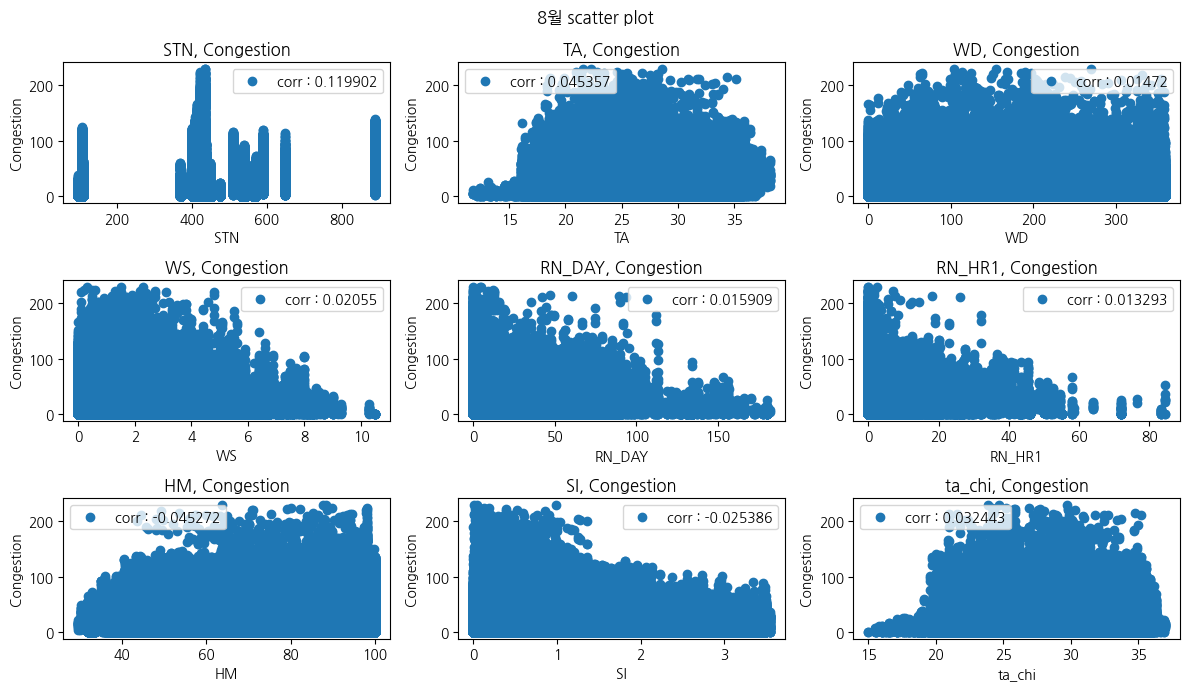

In [51]:
month_scatter_plot(8)

STN, Congestion 상관계수 : 0.11754
TA, Congestion 상관계수 : 0.026057
WD, Congestion 상관계수 : 0.007243
WS, Congestion 상관계수 : 0.001727
RN_DAY, Congestion 상관계수 : -0.02869
RN_HR1, Congestion 상관계수 : -0.008889
HM, Congestion 상관계수 : -0.019954
SI, Congestion 상관계수 : -0.094136
ta_chi, Congestion 상관계수 : 0.016407


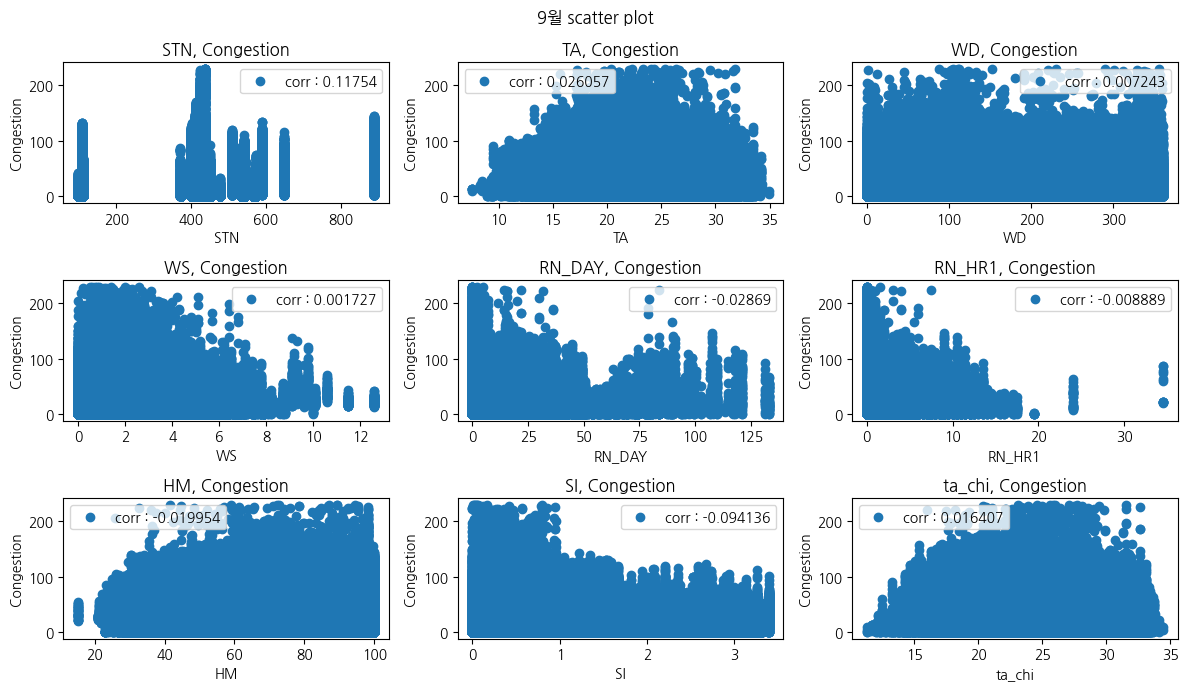

In [52]:
month_scatter_plot(9)

STN, Congestion 상관계수 : 0.12455
TA, Congestion 상관계수 : -0.035741
WD, Congestion 상관계수 : 0.0197
WS, Congestion 상관계수 : -0.041389
RN_DAY, Congestion 상관계수 : -0.061585
RN_HR1, Congestion 상관계수 : -0.013853
HM, Congestion 상관계수 : -0.063439
SI, Congestion 상관계수 : -0.093672
ta_chi, Congestion 상관계수 : -0.036059


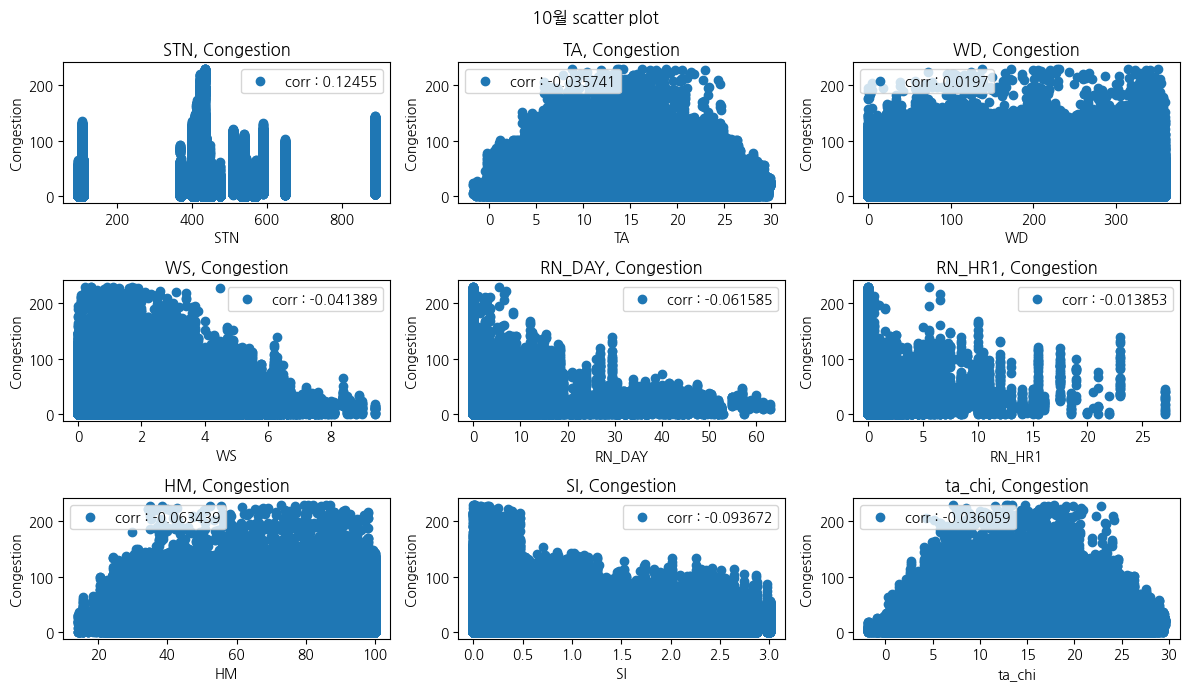

In [53]:
month_scatter_plot(10)

STN, Congestion 상관계수 : 0.123714
TA, Congestion 상관계수 : -0.025176
WD, Congestion 상관계수 : 0.034857
WS, Congestion 상관계수 : -0.010659
RN_DAY, Congestion 상관계수 : -0.013883
RN_HR1, Congestion 상관계수 : -0.005826
HM, Congestion 상관계수 : -0.00699
SI, Congestion 상관계수 : -0.200069
ta_chi, Congestion 상관계수 : -0.025795


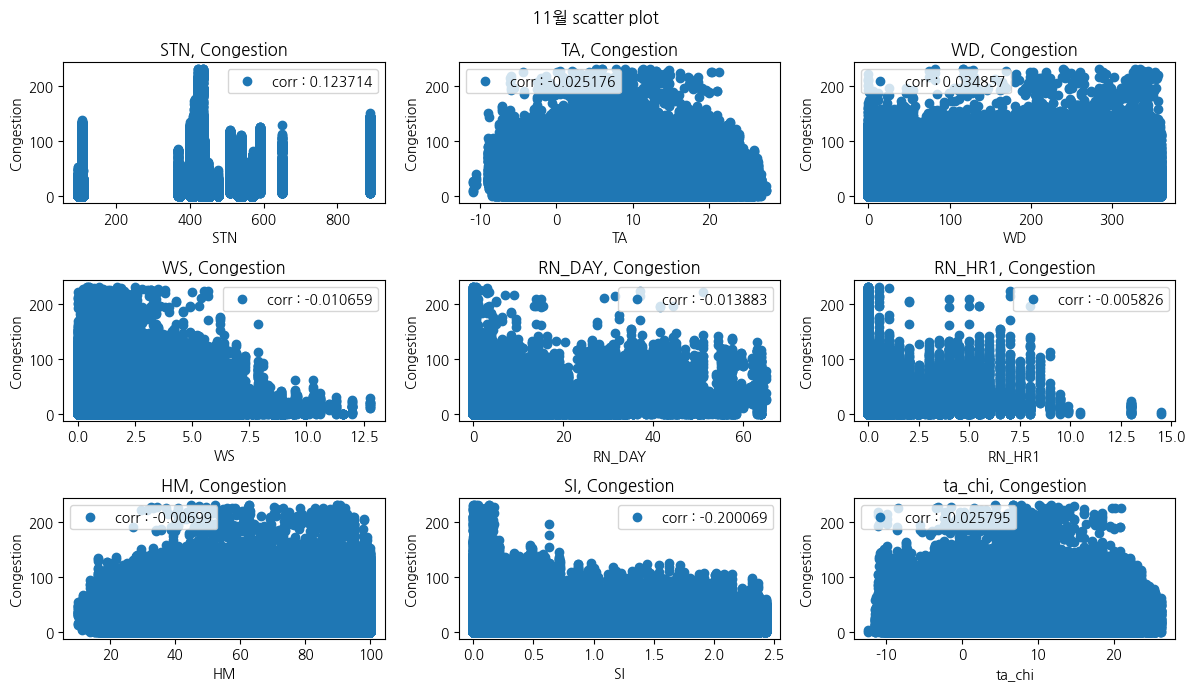

In [54]:
month_scatter_plot(11)

STN, Congestion 상관계수 : 0.112656
TA, Congestion 상관계수 : 0.017929
WD, Congestion 상관계수 : 0.008844
WS, Congestion 상관계수 : 6.7e-05
RN_DAY, Congestion 상관계수 : 0.040634
RN_HR1, Congestion 상관계수 : 0.020287
HM, Congestion 상관계수 : 0.019457
SI, Congestion 상관계수 : -0.175721
ta_chi, Congestion 상관계수 : 0.01687


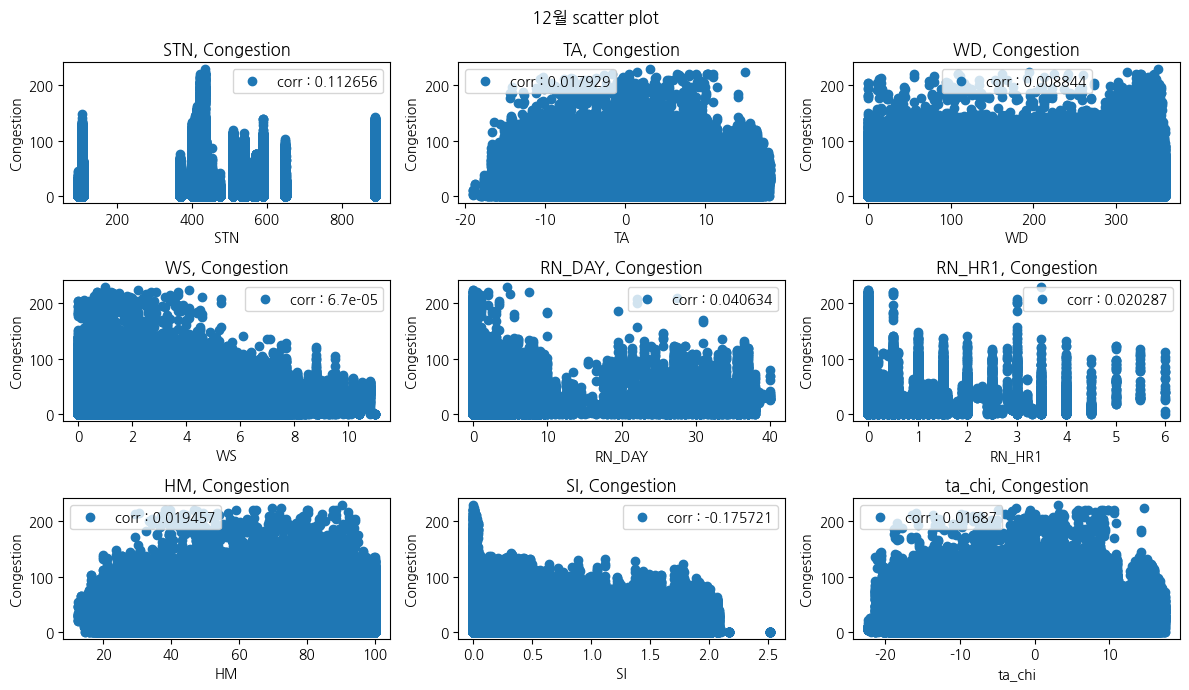

In [55]:
month_scatter_plot(12)

In [27]:
train_subway_dropna_0_df['season'] = ''

for i in range(train_subway_dropna_0_df.shape[0]):
    if train_subway_dropna_0_df.iloc[i,-2] in [3,4,5]:
        train_subway_dropna_0_df.iloc[i,-1]="봄"
    elif train_subway_dropna_0_df.iloc[i,-2] in [6,7,8]:
        train_subway_dropna_0_df.iloc[i,-1]="여름"
    elif train_subway_dropna_0_df.iloc[i,-2] in [9,10,11]:
        train_subway_dropna_0_df.iloc[i,-1]="가을"
    else:
        train_subway_dropna_0_df.iloc[i,-1]="겨울"
    
train_subway_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion,month,season
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10,7,여름
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14,7,여름
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32,7,여름
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48,7,여름
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34,7,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13,12,겨울
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14,12,겨울
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16,12,겨울
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19,12,겨울


In [28]:
train_subway_dropna_0_df['season'].value_counts()

season
여름    2786789
봄     2531218
가을    2268796
겨울    2007333
Name: count, dtype: int64

In [20]:
def season_scatter_plot(season):
    col = 3 
    row = 3 
    column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']
    train_subway_df_choice_season= train_subway_dropna_0_df[train_subway_dropna_0_df['season']==season]

    plt.figure(figsize=(12,7))

    for i, colum_name in enumerate(column_list,1):
        plt.subplot(col, row, i)
        plt.title(f'{colum_name}, Congestion')
        corr_result = train_subway_df_choice_season.corr(numeric_only=True)['Congestion'][colum_name]
        plt.scatter(train_subway_df_choice_season[colum_name], train_subway_df_choice_season['Congestion'], label=f'corr : {round(corr_result,6)}')
        print(f'{colum_name}, Congestion 상관계수 : {round(corr_result,6)}')
        plt.xlabel(colum_name)
        plt.ylabel('Congestion')
        plt.legend(loc="best")

    plt.suptitle(f"{season} scatter plot")
    plt.tight_layout()
    plt.show()

STN, Congestion 상관계수 : 0.120055
TA, Congestion 상관계수 : 0.06462
WD, Congestion 상관계수 : -0.001711
WS, Congestion 상관계수 : -0.015652
RN_DAY, Congestion 상관계수 : -0.059671
RN_HR1, Congestion 상관계수 : -0.052486
HM, Congestion 상관계수 : -0.095754
SI, Congestion 상관계수 : -0.043043
ta_chi, Congestion 상관계수 : 0.054788


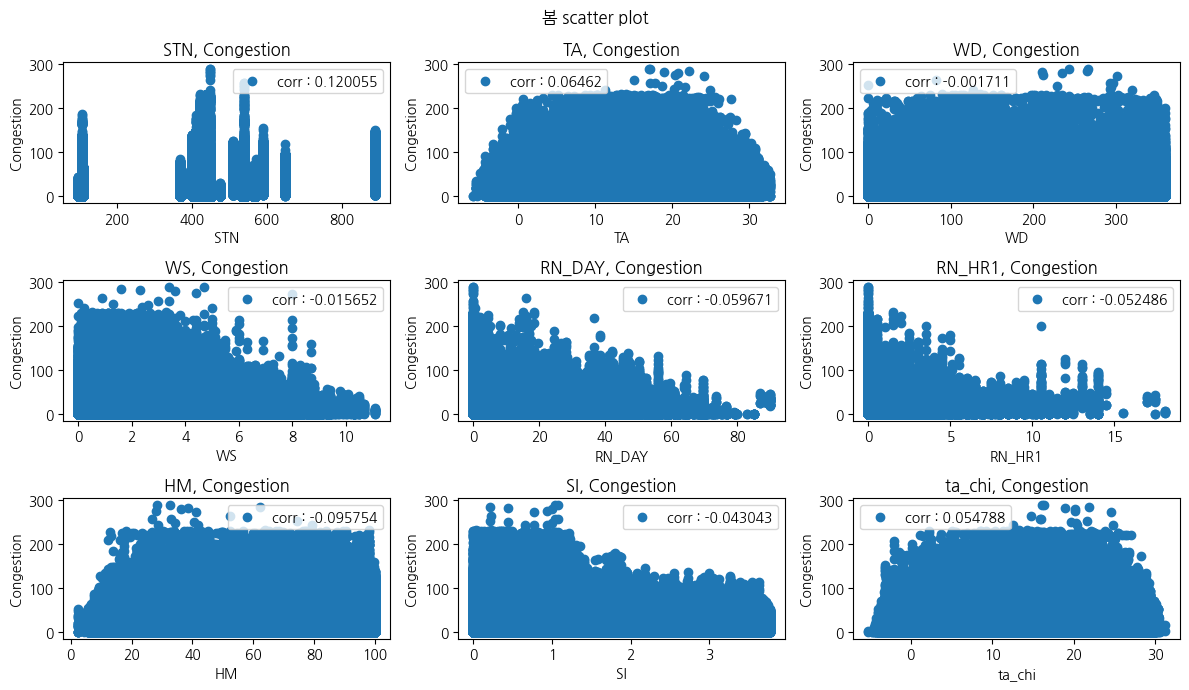

In [21]:
season_scatter_plot("봄")

STN, Congestion 상관계수 : 0.120111
TA, Congestion 상관계수 : 0.018302
WD, Congestion 상관계수 : 0.023836
WS, Congestion 상관계수 : 0.011441
RN_DAY, Congestion 상관계수 : 0.016605
RN_HR1, Congestion 상관계수 : 0.002544
HM, Congestion 상관계수 : -0.042658
SI, Congestion 상관계수 : -0.024815
ta_chi, Congestion 상관계수 : 0.000315


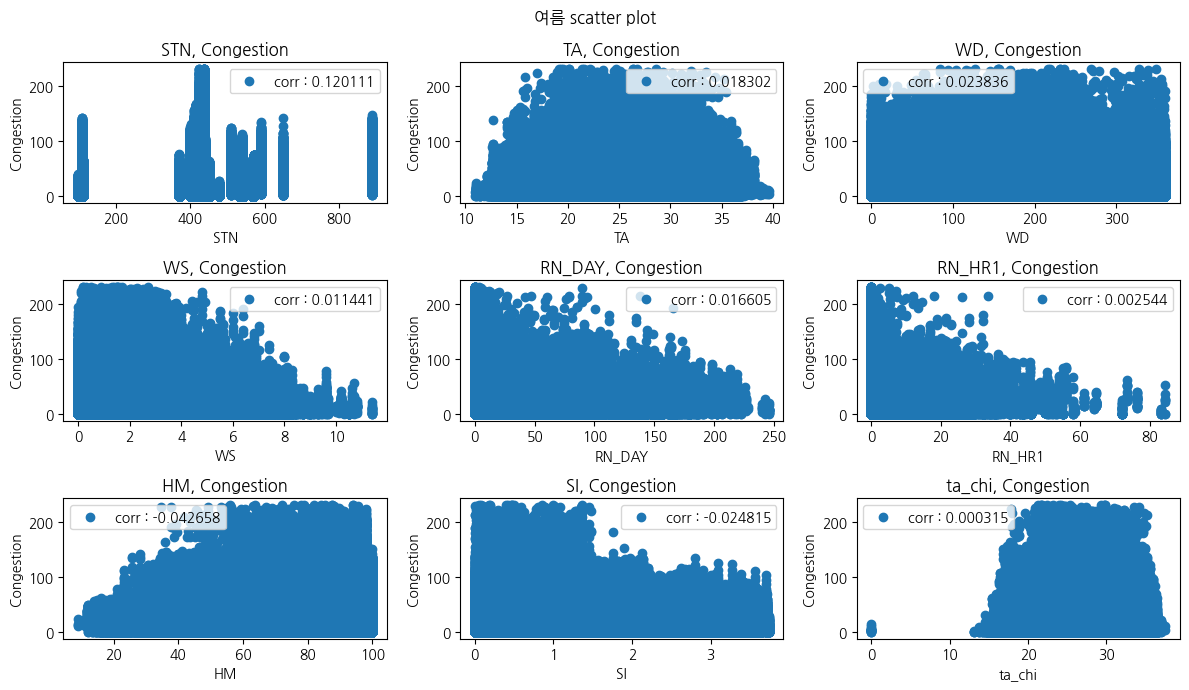

In [21]:
season_scatter_plot("여름")

STN, Congestion 상관계수 : 0.121399
TA, Congestion 상관계수 : -0.065124
WD, Congestion 상관계수 : 0.03437
WS, Congestion 상관계수 : -0.015113
RN_DAY, Congestion 상관계수 : -0.035262
RN_HR1, Congestion 상관계수 : -0.012828
HM, Congestion 상관계수 : -0.043109
SI, Congestion 상관계수 : -0.128664
ta_chi, Congestion 상관계수 : -0.069266


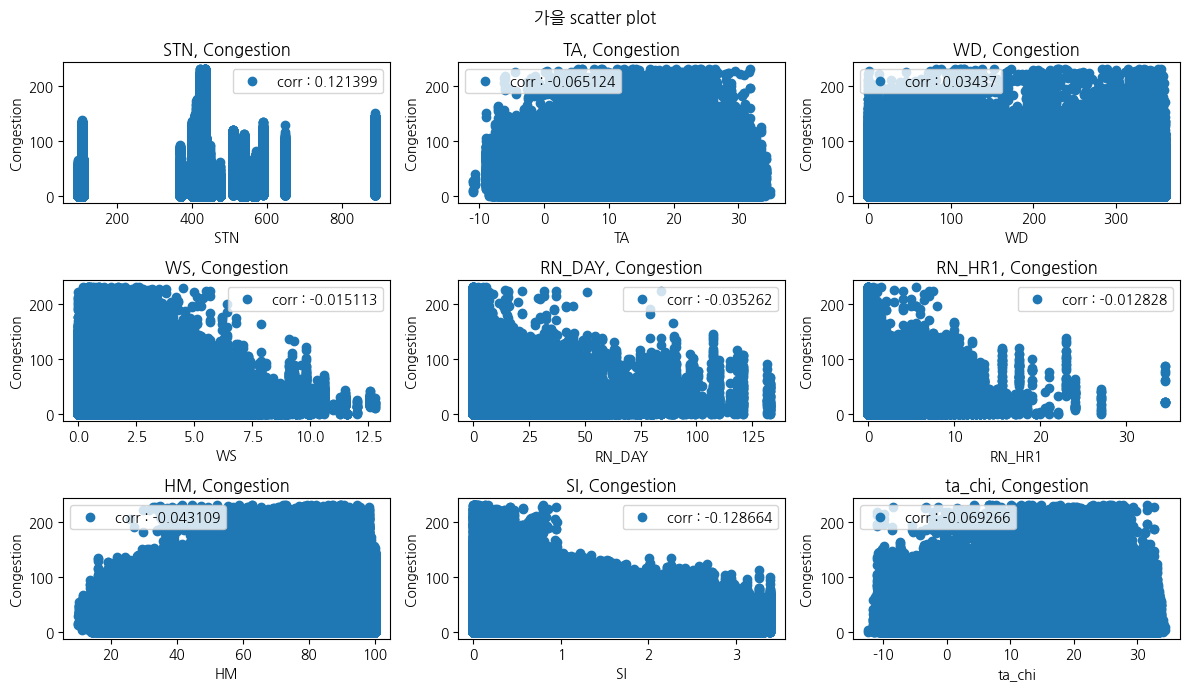

In [22]:
season_scatter_plot("가을")

STN, Congestion 상관계수 : 0.118699
TA, Congestion 상관계수 : 0.028729
WD, Congestion 상관계수 : 0.000951
WS, Congestion 상관계수 : -0.026161
RN_DAY, Congestion 상관계수 : 0.040446
RN_HR1, Congestion 상관계수 : 0.029782
HM, Congestion 상관계수 : 0.021899
SI, Congestion 상관계수 : -0.166888
ta_chi, Congestion 상관계수 : 0.031467


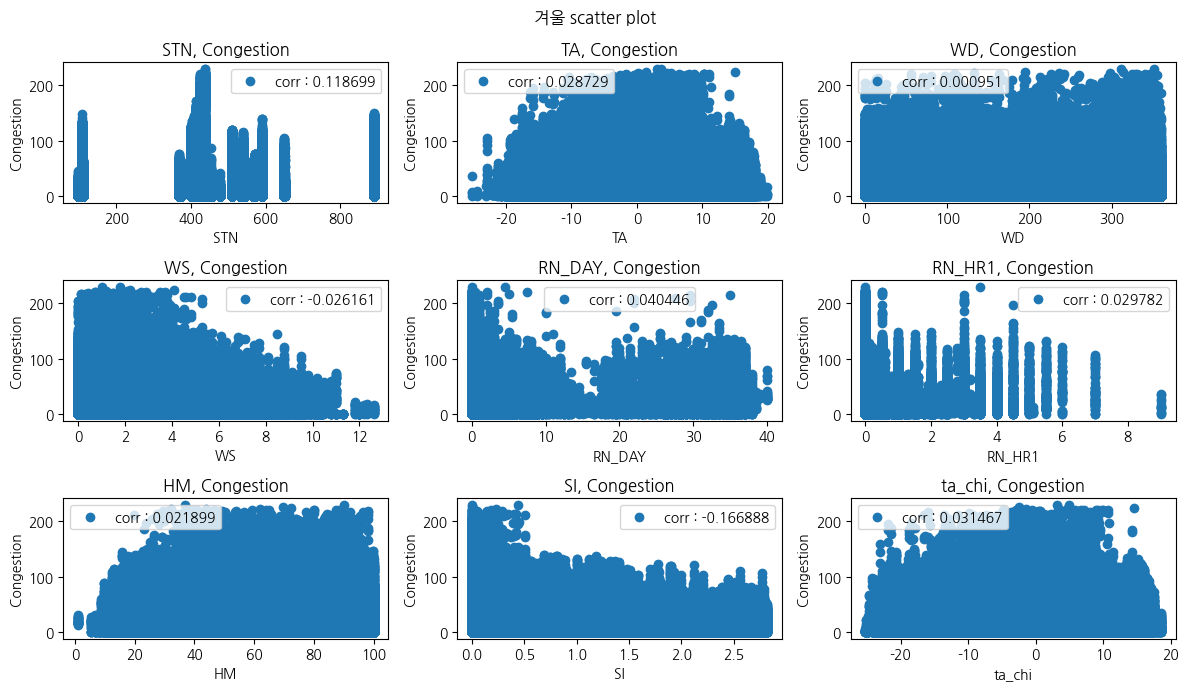

In [23]:
season_scatter_plot("겨울")

### 기상과 지하철 혼잡도 Spearman 상관분석

결측치 제거 후 분석

In [19]:
from scipy.stats import spearmanr

In [20]:
train_subway_df_spearman = train_subway_dropna_0_df.copy()
train_subway_df_spearman

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
0,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
1,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
2,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
3,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594131,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
9594132,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
9594133,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
9594134,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


STN spearman_coef : 0.06794690354936982, spearman_pvalue : 0.0, p_threshold : True
TA spearman_coef : 0.01652021230949056, spearman_pvalue : 0.0, p_threshold : True
WD spearman_coef : 0.01901404170205318, spearman_pvalue : 0.0, p_threshold : True
WS spearman_coef : 0.0393384705373101, spearman_pvalue : 0.0, p_threshold : True
RN_DAY spearman_coef : -0.02708264203209466, spearman_pvalue : 0.0, p_threshold : True
RN_HR1 spearman_coef : -0.026753012439064278, spearman_pvalue : 0.0, p_threshold : True
HM spearman_coef : -0.0985087967951096, spearman_pvalue : 0.0, p_threshold : True
SI spearman_coef : 0.023843220162188823, spearman_pvalue : 0.0, p_threshold : True
ta_chi spearman_coef : 0.0046686072163856715, spearman_pvalue : 2.142653433017558e-47, p_threshold : False


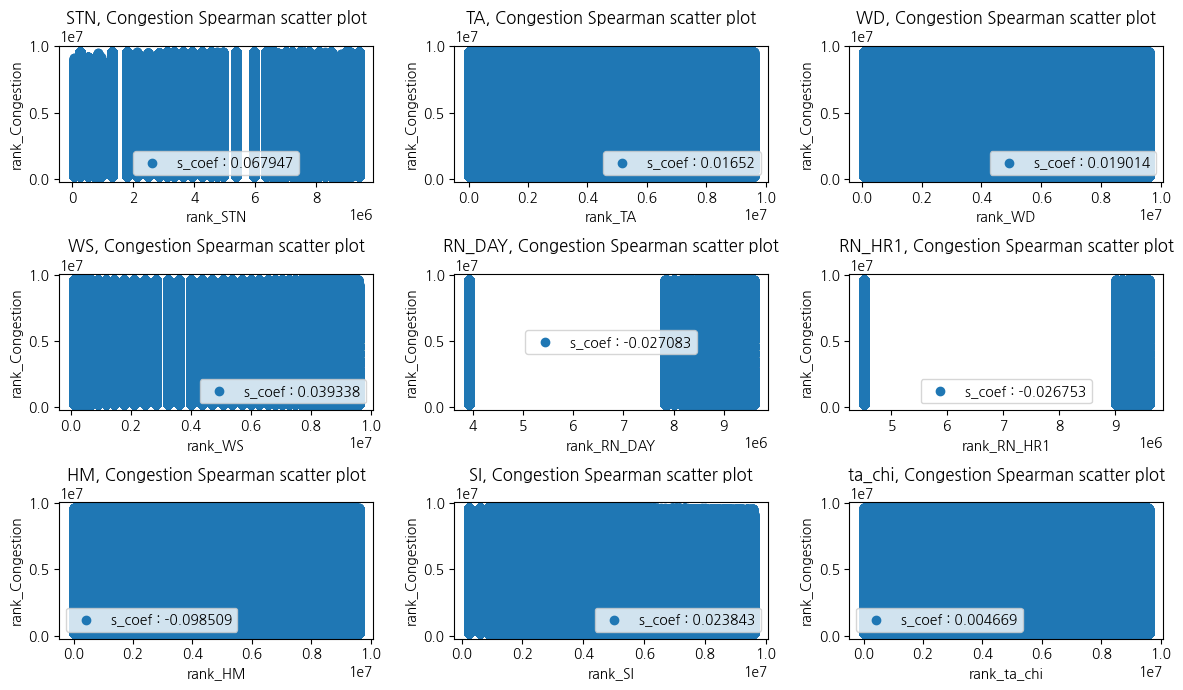

In [21]:
col = 3 
row = 3 
column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']

train_subway_df_spearman['rank_Congestion'] = train_subway_df_spearman['Congestion'].rank()

plt.figure(figsize=(12,7))

for i, column_name in enumerate(column_list,1):
    plt.subplot(col, row, i)
    plt.title(f'{column_name}, Congestion Spearman scatter plot')
    spearman_coef, spearman_pvalue = spearmanr(train_subway_df_spearman[column_name], train_subway_df_spearman['Congestion'])
    train_subway_df_spearman['rank_{column_name}'] = train_subway_df_spearman[column_name].rank()
    plt.scatter(train_subway_df_spearman['rank_{column_name}'], train_subway_df_spearman['rank_Congestion'], label=f's_coef : {round(spearman_coef,6)}')
    print(f'{column_name} spearman_coef : {spearman_coef}, spearman_pvalue : {spearman_pvalue}, p_threshold : {np.finfo(float).tiny > spearman_pvalue }')
    plt.xlabel(f'rank_{column_name}')
    plt.ylabel('rank_Congestion')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()